In [1]:
import re
import unicodedata
import pandas as pd
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from env import get_connection

import warnings
warnings.filterwarnings('ignore')

### 1. Spam Data

    a. Load the spam data set.
    b. Create and explore bigrams for the spam data. Visualize them with a word cloud.
    How do they compare with the ham bigrams?
    c. Is there any overlap in the bigrams for the spam data and the ham data?
    d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam
    and ham data.

In [2]:
url = get_connection('spam_db')
query = '''
        SELECT *
        FROM spam
        '''

df = pd.read_sql(query, url, index_col='id')
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
def clean_text(text, extra_stopwords=['r', 'u', '2', 'ltgt']):
    
    wnl = nltk.stem.WordNetLemmatizer()
    
    stopwords = nltk.corpus.stopwords.words('english') + extra_stopwords
    
    clean_text = (unicodedata.normalize('NFKD', text)
                   .encode('ascii', 'ignore')
                   .decode('utf-8', 'ignore')
                   .lower())
    
    words = re.sub(r'[^\w\s]', '', clean_text).split()
    
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [4]:
ham_words = clean_text(' '.join(df[df['label'] == 'ham']['text']))
spam_words = clean_text(' '.join(df[df['label'] == 'spam']['text']))
all_words = clean_text(' '.join(df['text']))

In [5]:
ham_counts = pd.Series(ham_words).value_counts()
spam_counts = pd.Series(spam_words).value_counts()
all_counts = pd.Series(all_words).value_counts()

In [6]:
top_20_spam_bigrams = pd.Series(nltk.ngrams(spam_words, 2))\
                                    .value_counts()\
                                    .head(20)

top_20_spam_bigrams.head()

(please, call)         44
(customer, service)    27
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
dtype: int64

In [7]:
def make_ngrams(words, n):
    
    return pd.Series(nltk.ngrams(words, n))\
                         .value_counts()\
                         .head(20)

In [8]:
test = make_ngrams(spam_words, 2)

test.head()

(please, call)         44
(customer, service)    27
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
dtype: int64

<AxesSubplot:>

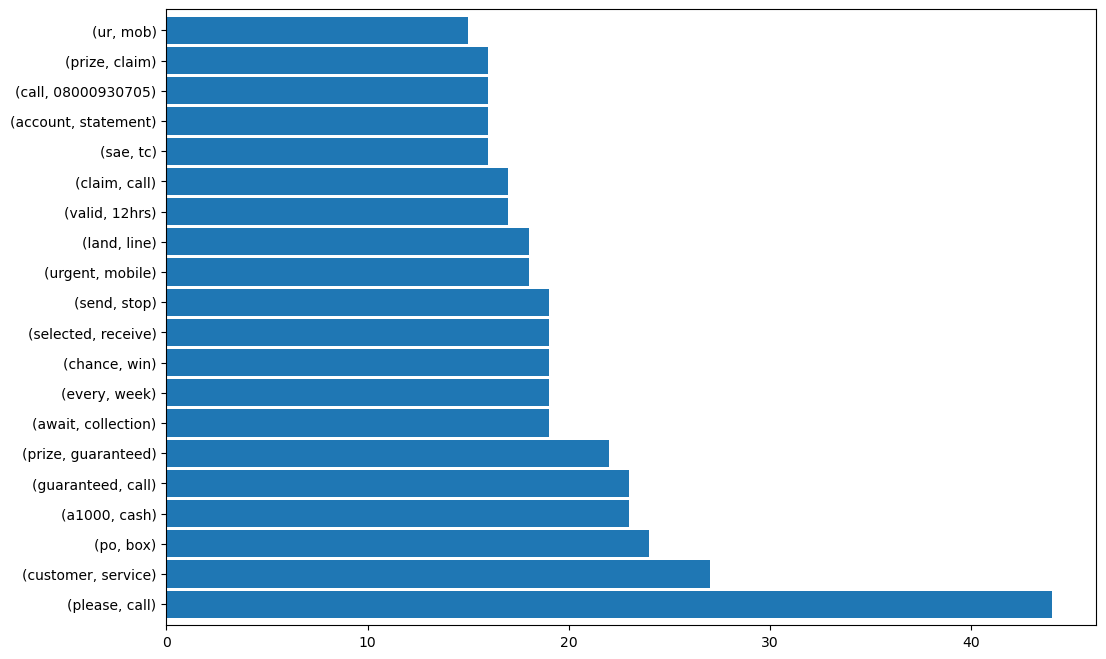

In [9]:
top_20_spam_bigrams.sort_values(ascending=False).plot.barh(width=0.9, figsize=(12, 8))


In [10]:
top_20_spam_bigrams.to_dict()


{('please', 'call'): 44,
 ('customer', 'service'): 27,
 ('po', 'box'): 24,
 ('a1000', 'cash'): 23,
 ('guaranteed', 'call'): 23,
 ('prize', 'guaranteed'): 22,
 ('send', 'stop'): 19,
 ('selected', 'receive'): 19,
 ('await', 'collection'): 19,
 ('every', 'week'): 19,
 ('chance', 'win'): 19,
 ('urgent', 'mobile'): 18,
 ('land', 'line'): 18,
 ('valid', '12hrs'): 17,
 ('claim', 'call'): 17,
 ('sae', 'tc'): 16,
 ('account', 'statement'): 16,
 ('call', '08000930705'): 16,
 ('prize', 'claim'): 16,
 ('ur', 'mob'): 15}

In [11]:
top_20_spam_bigrams.to_dict().items()


dict_items([(('please', 'call'), 44), (('customer', 'service'), 27), (('po', 'box'), 24), (('a1000', 'cash'), 23), (('guaranteed', 'call'), 23), (('prize', 'guaranteed'), 22), (('send', 'stop'), 19), (('selected', 'receive'), 19), (('await', 'collection'), 19), (('every', 'week'), 19), (('chance', 'win'), 19), (('urgent', 'mobile'), 18), (('land', 'line'), 18), (('valid', '12hrs'), 17), (('claim', 'call'), 17), (('sae', 'tc'), 16), (('account', 'statement'), 16), (('call', '08000930705'), 16), (('prize', 'claim'), 16), (('ur', 'mob'), 15)])

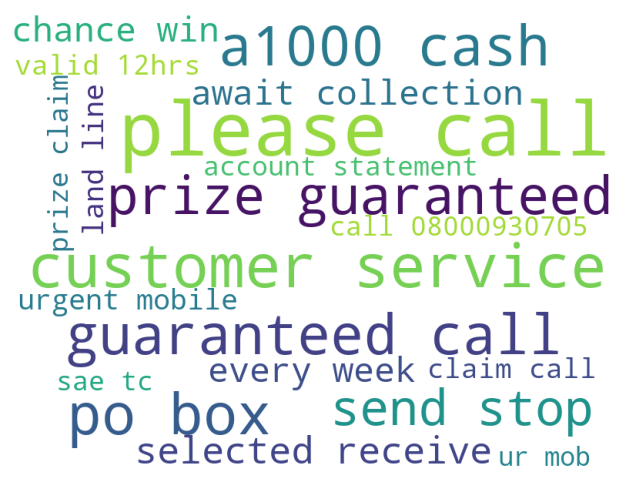

In [12]:
spam_bigram_data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
spam_bigram_img = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(spam_bigram_data)
plt.figure(figsize=(10, 6))
plt.imshow(spam_bigram_img)
plt.axis('off')
plt.show()


In [13]:
def plot_bigrams(words):
    
    word_data = {k[0] + ' ' + k[1]: v for k, v in words.to_dict().items()}
    
    word_img = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(word_data)
    
    plt.figure(figsize=(10, 6))
    
    plt.imshow(word_img)
    
    plt.axis('off')
    
    plt.show()

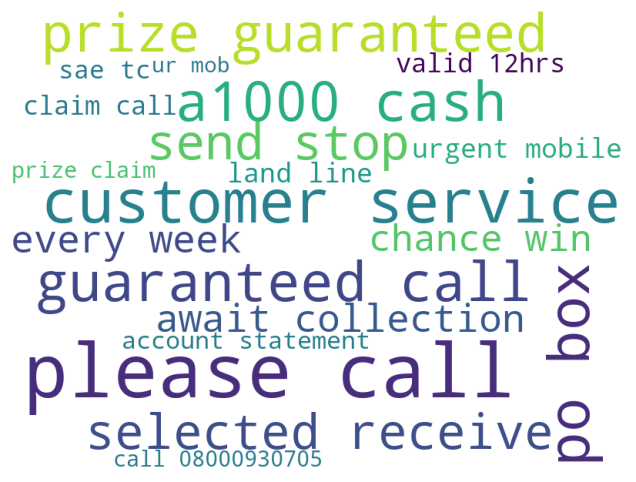

In [14]:
plot_bigrams(top_20_spam_bigrams)


In [15]:
top_20_ham_bigrams = make_ngrams(ham_words, 2)


In [16]:
ham_bigram_data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}


In [17]:
overlap_list = [bigram for bigram in top_20_spam_bigrams.keys() if bigram in top_20_ham_bigrams.keys()]

overlap_list

[]

In [18]:
top_20_spam_trigrams = make_ngrams(spam_words, 3)

<AxesSubplot:>

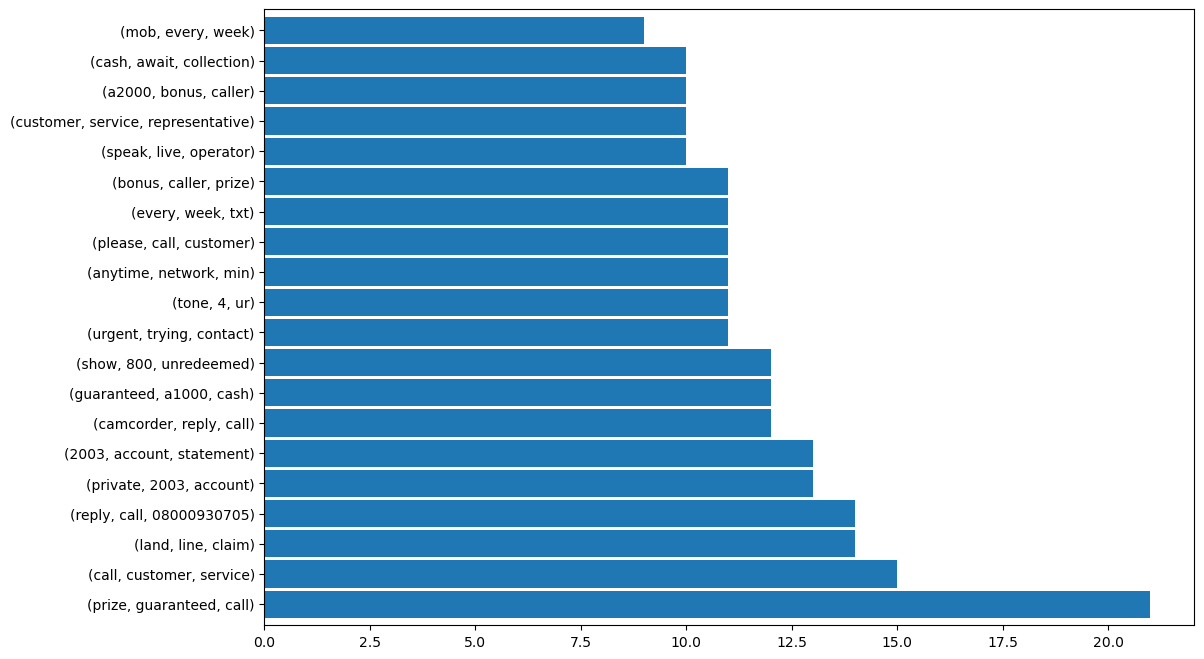

In [19]:
top_20_spam_trigrams.plot.barh(width=0.9, figsize=(12, 8))


In [20]:
top_20_ham_trigrams = make_ngrams(ham_words, 3)

<AxesSubplot:>

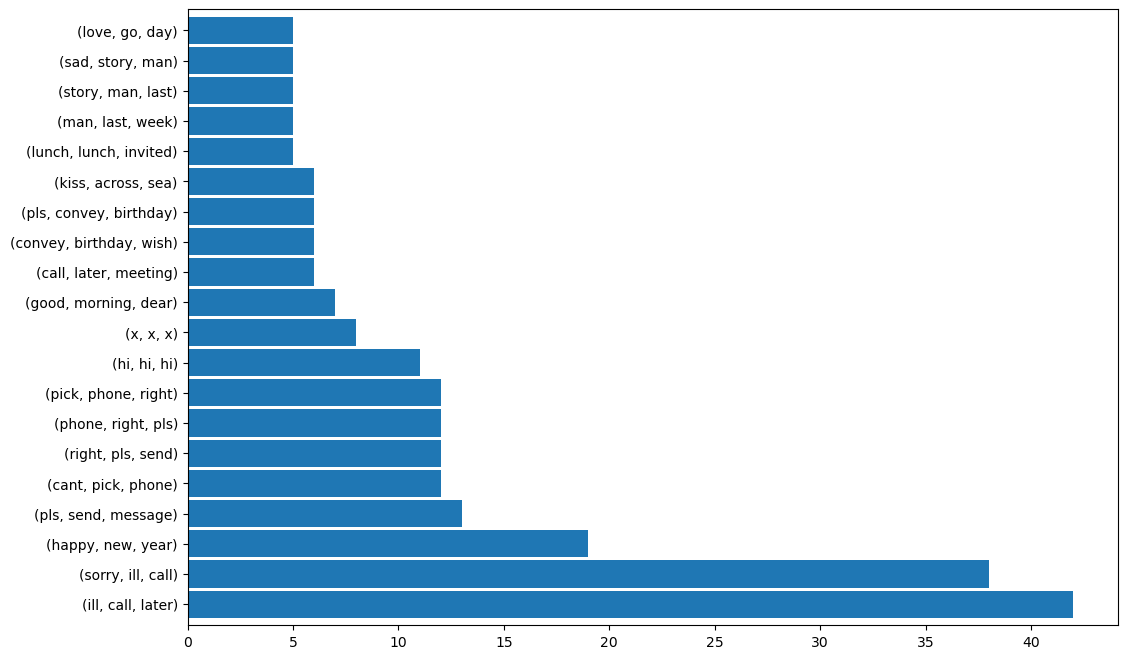

In [21]:
top_20_ham_trigrams.plot.barh(width=0.9, figsize=(12, 8))


In [22]:
spam_trigram_data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_spam_trigrams.to_dict().items()}
ham_trigram_data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_ham_trigrams.to_dict().items()}

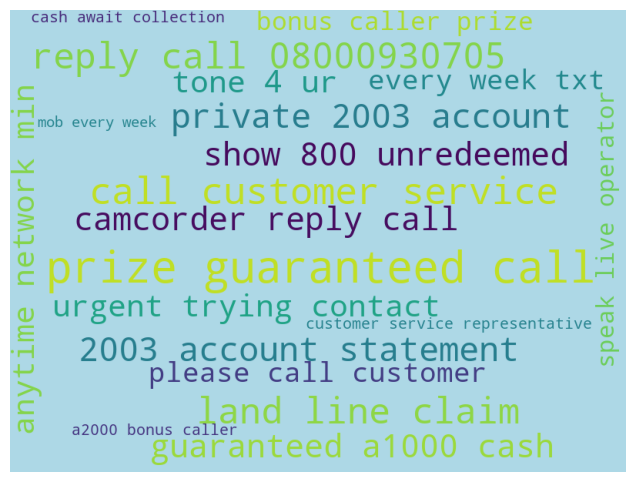

In [67]:
spam_trigram_img = WordCloud(background_color='lightblue', width=800, height=600).generate_from_frequencies(spam_trigram_data)
plt.figure(figsize=(10, 6))
plt.imshow(spam_trigram_img)
plt.axis('off')
plt.show()


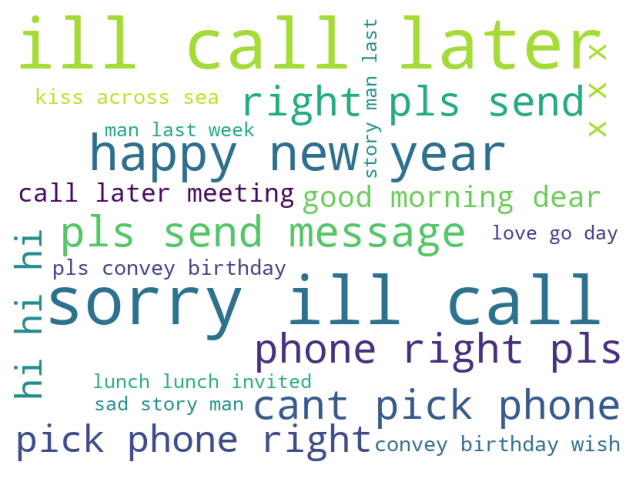

In [24]:
ham_trigram_img = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(ham_trigram_data)
plt.figure(figsize=(10, 6))
plt.imshow(ham_trigram_img)
plt.axis('off')
plt.show()


In [25]:
def plot_trigrams(words):
    
    word_data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in words.to_dict().items()}
    
    word_img = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(word_data)
    
    plt.figure(figsize=(10, 6))
    
    plt.imshow(word_img)
    
    plt.axis('off')
    
    plt.show()

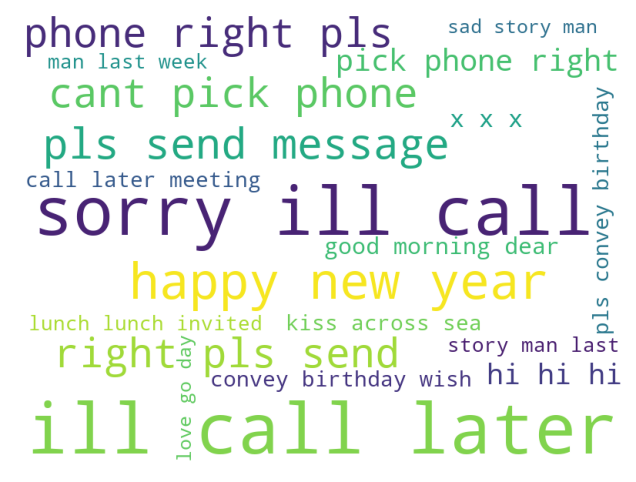

In [26]:
plot_trigrams(top_20_ham_trigrams)

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [69]:
blog_df = pd.read_csv('clean_codeup_blogs.csv')

blog_df.head()

,title,original,clean,stemmed,lemmatized
0,Black Excellence in Tech: Panelist Spotlight –...,Black excellence in tech: Panelist Spotlight –...,"['black', 'excellence', 'tech', 'panelist', 's...",black excel tech panelist spotlight wilmari de...,black excellence tech panelist spotlight wilma...
1,Black excellence in tech: Panelist Spotlight –...,Black excellence in tech: Panelist Spotlight –...,"['black', 'excellence', 'tech', 'panelist', 's...",black excel tech panelist spotlight stephani j...,black excellence tech panelist spotlight steph...
2,Black excellence in tech: Panelist Spotlight –...,Black excellence in tech: Panelist Spotlight –...,"['black', 'excellence', 'tech', 'panelist', 's...",black excel tech panelist spotlight jame coope...,black excellence tech panelist spotlight james...
3,Black excellence in tech: Panelist Spotlight –...,Black excellence in tech: Panelist Spotlight –...,"['black', 'excellence', 'tech', 'panelist', 's...",black excel tech panelist spotlight jeanic fre...,black excellence tech panelist spotlight jeani...
4,Coding Bootcamp or Self-Learning? Which is Bes...,If you’re interested in embarking on a career ...,"['youre', 'interested', 'embarking', 'career',...",your interest embark career tech like taken lo...,youre interested embarking career tech likely ...


In [70]:
#Join the words together into one body of text
blog_words = ' '.join(blog_df['lemmatized'])

(-0.5, 399.5, 199.5, -0.5)

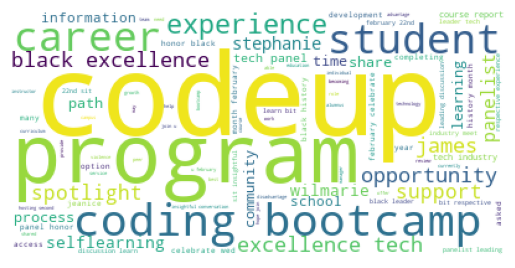

In [71]:
#Create a word cloud of 
blog_img = WordCloud(background_color='white').generate(blog_words)
plt.imshow(blog_img)
plt.axis('off')

In [72]:
#Create bigrams.. what's happening here?
top_20_blog_bigrams = make_ngrams(blog_words, 2)

top_20_blog_bigrams.head()

(e,  )    194
(i, n)    150
( , c)    124
( , s)    115
(t,  )    114
dtype: int64

In [73]:
#Could a list of words be more appropriate?
list(blog_words.split())

['black',
 'excellence',
 'tech',
 'panelist',
 'spotlight',
 'wilmarie',
 'de',
 'la',
 'cruz',
 'mejia',
 'codeup',
 'hosting',
 'black',
 'excellence',
 'tech',
 'panel',
 'honor',
 'black',
 'history',
 'month',
 'february',
 '22',
 '2023',
 'celebrate',
 'wed',
 'like',
 'spotlight',
 'panelist',
 'leading',
 'discussion',
 'learn',
 'bit',
 'respective',
 'experience',
 'black',
 'leader',
 'tech',
 'industry',
 'meet',
 'wilmarie',
 'wilmarie',
 'de',
 'la',
 'cruz',
 'mejia',
 'current',
 'codeup',
 'student',
 'path',
 'becoming',
 'fullstack',
 'web',
 'developer',
 'dallas',
 'tx',
 'campus',
 'wilmarie',
 'veteran',
 'expanding',
 'knowledge',
 'programming',
 'language',
 'technology',
 'journey',
 'codeup',
 'asked',
 'wilmarie',
 'share',
 'experience',
 'codeup',
 'share',
 'able',
 'meet',
 'people',
 'passionate',
 'coding',
 'positive',
 'learning',
 'environment',
 'hope',
 'join',
 'u',
 'february',
 '22nd',
 'sit',
 'insightful',
 'conversation',
 'wilmarie',
 'pa

In [74]:
#Make a list of words
blog_words = list(blog_words.split())

In [75]:
#Form bigrams. Is this expected performance now?
top_20_blog_bigrams = make_ngrams(blog_words, 2)

top_20_blog_bigrams.head()

(black, excellence)    9
(coding, bootcamps)    9
(excellence, tech)     9
(course, report)       5
(tech, industry)       5
dtype: int64

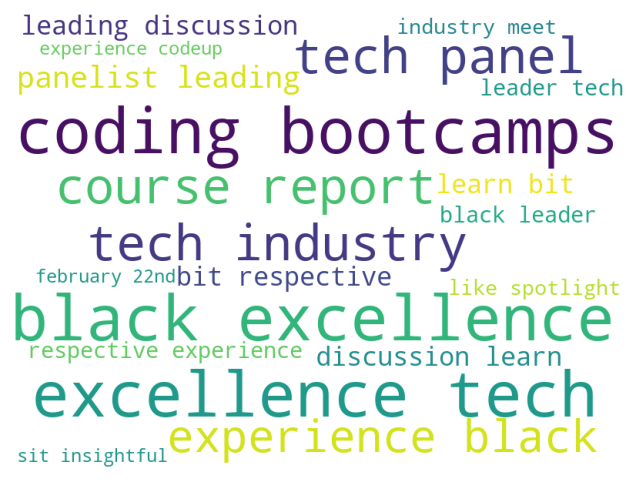

In [76]:
#Visualize the bigrams
plot_bigrams(top_20_blog_bigrams)

In [77]:
#Create trigrams
top_20_blog_trigrams = make_ngrams(blog_words, 3)

top_20_blog_trigrams.head()

(black, excellence, tech)      9
(excellence, tech, panel)      5
(2023, celebrate, wed)         4
(wed, like, spotlight)         4
(like, spotlight, panelist)    4
dtype: int64

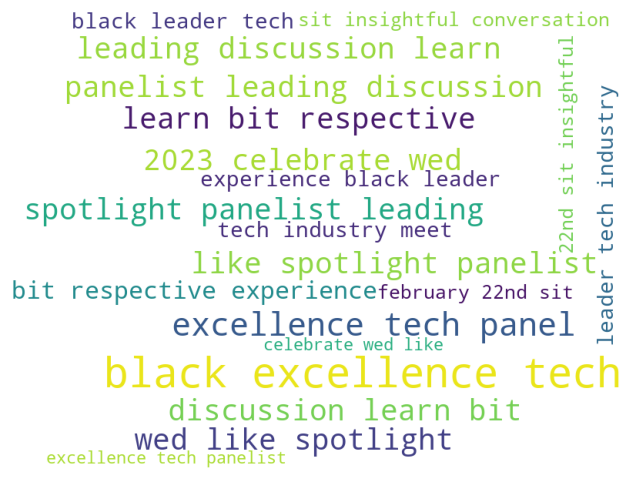

In [78]:
#Plot
plot_trigrams(top_20_blog_trigrams)

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [41]:
news_df = pd.read_csv('clean_news_blogs.csv')

news_df.head()

,title,original,category,clean,stemmed,lemmatized
0,"Bill Gates meets Ratan Tata, N Chandrasekaran;...",Microsoft Co-founder Bill Gates met with Tata ...,business,"['microsoft', 'cofounder', 'bill', 'gates', 'm...",microsoft cofound bill gate met tata son chair...,microsoft cofounder bill gate met tata son cha...
1,SoftBank sells shares worth ₹954 crore in logi...,SoftBank sold shares worth ₹954 crore in logis...,business,"['softbank', 'sold', 'shares', 'worth', '954',...",softbank sold share worth 954 crore logist com...,softbank sold share worth 954 crore logistics ...
2,Smriti Irani's 2011 tweet on LPG price hike re...,Hours after the central government raised the ...,business,"['hours', 'central', 'government', 'raised', '...",hour central govern rais price commerci lpg cy...,hour central government raised price commercia...
3,"Indian-Americans Renjen, Subramaniam to be mem...",Indian-Americans Punit Renjen and Rajesh Subra...,business,"['indianamericans', 'punit', 'renjen', 'rajesh...",indianamerican punit renjen rajesh subramaniam...,indianamericans punit renjen rajesh subramania...
4,Adani denies report of securing $3 bn from sov...,Adani Group has denied a report which claimed ...,business,"['adani', 'group', 'denied', 'report', 'claime...",adani group deni report claim secur 3 billion ...,adani group denied report claimed secured 3 bi...


In [42]:
business_words = list(' '.join(news_df[news_df['category'] == 'business']['lemmatized']).split())

business_words

['microsoft',
 'cofounder',
 'bill',
 'gate',
 'met',
 'tata',
 'son',
 'chairman',
 'emeritus',
 'ratan',
 'tata',
 'tata',
 'son',
 'chairman',
 'natarajan',
 'chandrasekaran',
 'bill',
 'enriching',
 'discussion',
 'ratan',
 'tata',
 'n',
 'chandrasekaran',
 'philanthropic',
 'initiative',
 'gate',
 'foundation',
 'india',
 'said',
 'tweet',
 'look',
 'forward',
 'strengthening',
 'work',
 'together',
 'partnering',
 'health',
 'diagnostics',
 'nutrition',
 'added',
 'softbank',
 'sold',
 'share',
 'worth',
 '954',
 'crore',
 'logistics',
 'company',
 'delhivery',
 'bulk',
 'deal',
 '340piece',
 'bse',
 'data',
 'showed',
 'wednesday',
 "'",
 's',
 'sale',
 '28',
 'crore',
 'share',
 'softbank',
 'pared',
 'stake',
 'delhivery',
 'around',
 '14',
 'softbank',
 'invested',
 'around',
 '3100',
 'crore',
 'delhivery',
 'offloaded',
 'share',
 'worth',
 '618',
 'crore',
 'ipo',
 'held',
 '18',
 'stake',
 'decemberend',
 'hour',
 'central',
 'government',
 'raised',
 'price',
 'commercia

In [43]:
sports_words = list(' '.join(news_df[news_df['category'] == 'sports']['lemmatized']).split())
technology_words = list(' '.join(news_df[news_df['category'] == 'technology']['lemmatized']).split())
entertainment_words = list(' '.join(news_df[news_df['category'] == 'entertainment']['lemmatized']).split())

In [44]:
business_top_20 = pd.Series(business_words).value_counts().head(20)

business_top_20

'                 29
s                 23
said              18
india             16
gate              12
bank               9
health             8
added              8
fund               7
bill               7
company            6
crore              6
ceo                6
cofounder          6
price              5
share              5
digital            5
infrastructure     5
microsoft          5
group              4
dtype: int64

In [45]:
#Repeat the process for the other categories
sports_top_20 = pd.Series(sports_words).value_counts().head(20)
technology_top_20 = pd.Series(technology_words).value_counts().head(20)
entertainment_top_20 = pd.Series(entertainment_words).value_counts().head(20)

In [46]:
entertainment_top_20

'           85
s           22
actor       21
said        21
added       12
film        12
shared       9
like         6
speaking     6
khan         6
actress      5
also         5
singer       5
even         4
feel         4
told         4
time         4
took         4
kapil        4
got          4
dtype: int64

In [47]:
news_df['category'].value_counts()

business         25
sports           25
technology       25
entertainment    25
Name: category, dtype: int64

In [48]:
#Remove the pesky apostrophe
business_top_20 = business_top_20.drop("'")
sports_top_20 = sports_top_20.drop("'")
technology_top_20 = technology_top_20.drop("'")
entertainment_top_20 = entertainment_top_20.drop("'")

In [49]:
#Compile my most frequent words from each category in one dataframe
top_words = pd.concat([pd.DataFrame(business_top_20).reset_index(),
                       pd.DataFrame(sports_top_20).reset_index(),
                       pd.DataFrame(technology_top_20).reset_index(),
                       pd.DataFrame(entertainment_top_20).reset_index()])

In [50]:
#Housecleaning
top_words.rename(columns={'index': 'word', 0: 'count'}, inplace=True)

top_words.head()

,word,count
0,s,23
1,said,18
2,india,16
3,gate,12
4,bank,9


In [51]:
#Are any words frequently used across multiple subjects?
top_words['word'].value_counts().head(20)

s                 4
said              4
added             4
india             3
bill              2
infrastructure    2
digital           2
cofounder         2
microsoft         2
gate              2
health            2
time              1
like              1
5g                1
year              1
new               1
twitter           1
service           1
platform          1
actor             1
Name: word, dtype: int64

In [68]:
#Many frequently occurring words look business/technology related..
for word in list(business_top_20.index):
    
    if word in list(technology_top_20.index):
        
        print(f'Match found with word: {word}!')
        
    else:
        
        continue

Match found with word: s!
Match found with word: said!
Match found with word: india!
Match found with word: gate!
Match found with word: health!
Match found with word: added!
Match found with word: bill!
Match found with word: cofounder!
Match found with word: digital!
Match found with word: infrastructure!
Match found with word: microsoft!


In [53]:
#Create bigrams from each category's words
business_bigrams = make_ngrams(business_words, 2)
sports_bigrams = make_ngrams(sports_words, 2)
technology_bigrams = make_ngrams(technology_words, 2)
entertainment_bigrams = make_ngrams(entertainment_words, 2)

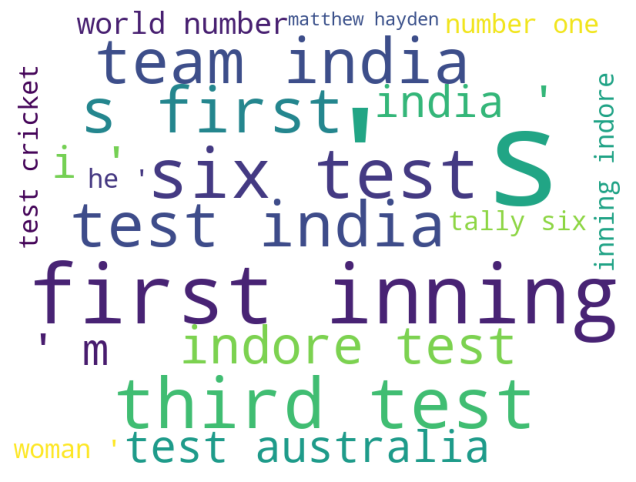

In [54]:
#Plot sports
plot_bigrams(sports_bigrams)

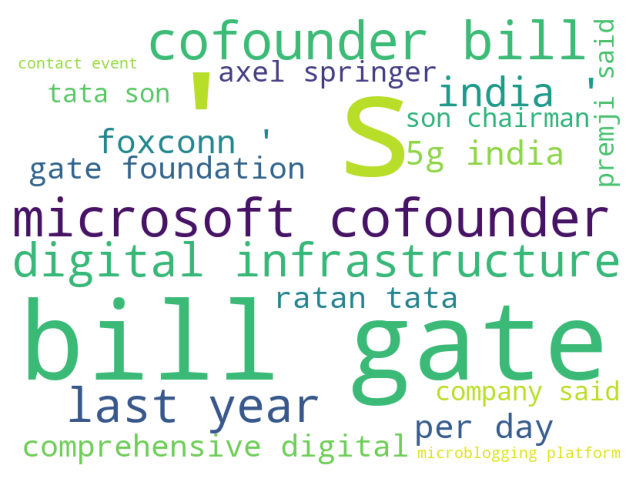

In [55]:
#Plot technology
plot_bigrams(technology_bigrams)

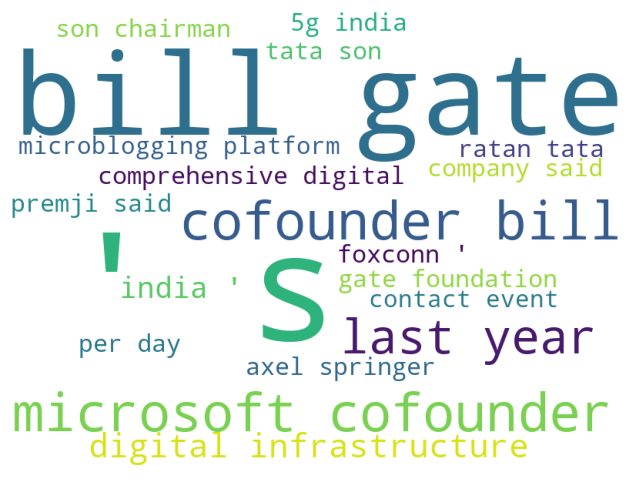

In [56]:
#Plot technology
plot_bigrams(technology_bigrams)

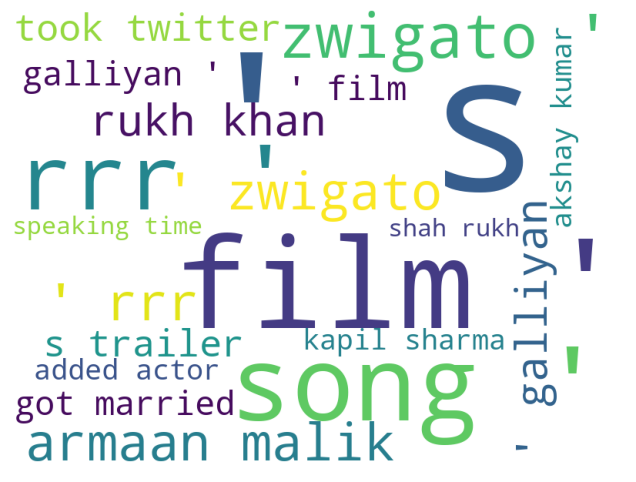

In [57]:
#Plot entertainment
plot_bigrams(entertainment_bigrams)